In [161]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
import base_psx.grid_bubble, base_psx.base
import importlib
from matplotlib import animation
importlib.reload(base_psx.grid_bubble)

def func(x):
    return x**2 + np.cos(x + 2)

def dfunc(x):
    return 2*x - np.sin(x + 2)

def func2(x):
    return np.sin(x)

def dfunc2(x):
    return np.cos(x)

def func3(x):
    return np.log(x)

def dfunc3(x):
    return 1/x

def loss3(r, epsilon):
    x = np.random.uniform(1, 2)
    loss = np.abs(base_psx.base.param_shift(func3, x, r, epsilon) - dfunc3(x))
    return loss

def loss2(r, epsilon):
    x = 1 # np.random.choice([1, 1])
    loss = np.abs(base_psx.base.param_shift(func2, x, r, epsilon) - dfunc2(x))
    return loss
    
def loss(r, epsilon):
    x = 1
    loss = np.abs(base_psx.base.param_shift(func, x, r, epsilon) - dfunc(x))
    return loss

# for i in range(2, 30, 3):
#     grid_bubble = base_psx.grid_bubble.GridBubble(loss_func = loss2, radius = 5)
#     solution = grid_bubble.fit(learning_rate = i, threshold=10**(-10))
#     plt.plot(grid_bubble.min_losses[:30], label = i)
# plt.legend()
# grid_bubble.plot(path = './test/')

What the strategy to adapt the best R

Khi chỉ có một điểm gradient thì lỗi bị chặn dưới MAPE = 3%
Khi random điểm gradient thì lỗi giảm sâu

Có những hàm vẫn ko tìm ra điểm chính xác được như hàm ln
Đã thử với hai hàm bình thường và ok với một điểm đạo hàm cho trước duy nhất

In [162]:
grid_bubble = base_psx.grid_bubble.GridBubble(loss_func = loss3, radius = 5)
solution = grid_bubble.fit(threshold=10**(-20))

C:\Users\haime\AppData\Local\Temp/ipykernel_8892/1047173043.py:22: RuntimeWarning: invalid value encountered in log
  return np.log(x)


In [156]:
r, s = solution

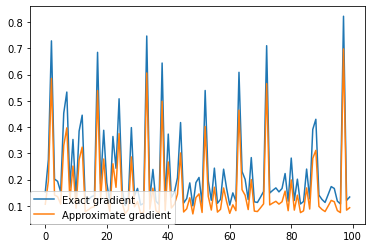

In [159]:
reals = []
fakes = []
for i in range(0, 100):
    x = np.random.uniform(1, 10)
    reals.append(dfunc3(x))
    fakes.append(base_psx.base.param_shift(func3, x, r, s))
plt.plot(range(0,100), reals, label="Exact gradient")
plt.plot(range(0,100), fakes, label="Approximate gradient")
plt.legend(loc='lower left', borderaxespad=0.)

In [160]:
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(reals, fakes))

0.29238906155050176


In [105]:
import glob
from PIL import Image
# Create the frames
frames = []
imgs = glob.glob("./test/*.png")
for i in imgs:
    new_frame = Image.open(i)
    frames.append(new_frame)
 
# Save into a GIF file that loops forever
frames[0].save('a.gif', format='GIF',
               append_images=frames[1:],
               save_all=True,
               duration=1000)